In [1]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import hilbert

## Example 4.1 The effect of an echo

$ y(t) = x(t) + ax(t-t_0)$ and $ x(t) = e^{-\lambda |t|}$


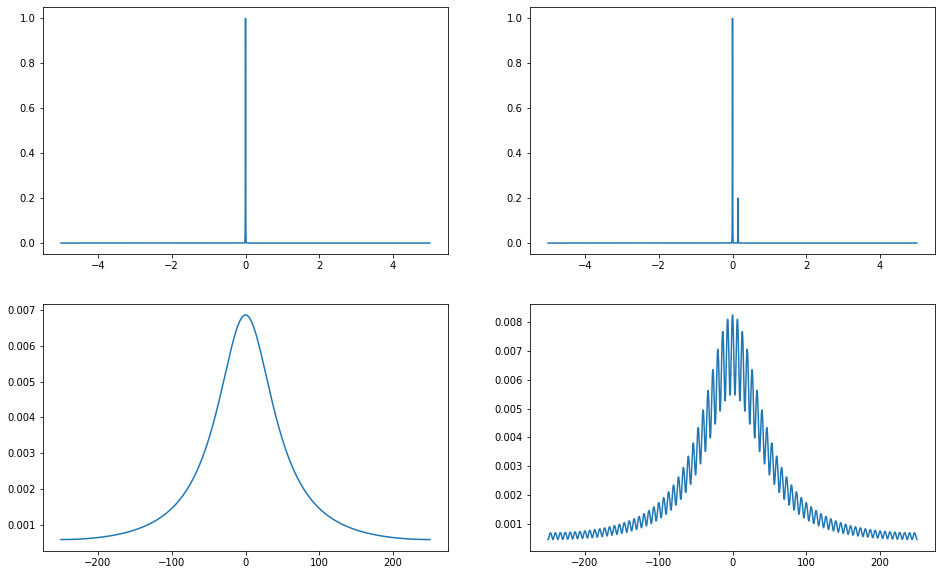

In [2]:
fs = 500
t = np.arange(-5, 5, 1 / fs)
lambda_ = 300
t_0 = 0.15
a = 0.2

x = np.exp(-lambda_ * np.abs(t))
y = x + (a * np.exp(-lambda_ * np.abs(t - t_0)))

X, Y = fftshift(np.abs(fft(x)) / fs), fftshift(np.abs(fft(y) / fs))

N = len(x)
f = np.arange(-fs/2, fs/2, fs/N)

plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
plt.plot(t, x)
plt.subplot(2,2,2)
plt.plot(t, y)
plt.subplot(2,2,3)
plt.plot(f, X)
plt.subplot(2,2,4)
plt.plot(f, Y)
plt.show()

## Example 4.2 Appearances of envelope and carrier signals

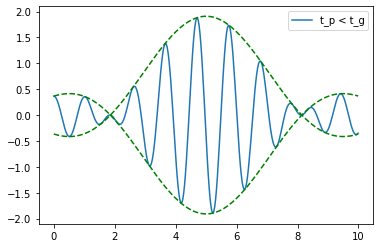

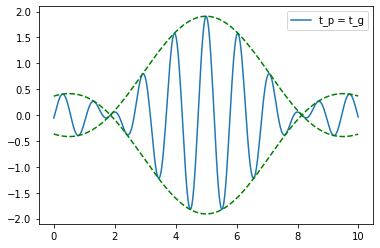

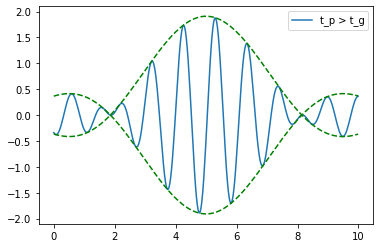

In [3]:
B = 1

A = 3
w_k = 6  # carrier freq: w_k >> B

t_g = 5
t_p_list = [4.7, 5, 5.3]
label_list = ["t_p < t_g", "t_p = t_g", "t_p > t_g"]

t = np.arange(0, 10, 0.03)
for i in range(len(t_p_list)):
    x = 2 * A * B * np.sin(B * (t - t_g)) / (np.pi * B * (t - t_g)) * np.cos(w_k * (t - t_p_list[i]))
    x_envelop = 2 * A * B * np.sin(B * (t - t_g)) / (np.pi * B * (t - t_g))

    plt.plot(t, x)
    plt.plot(t, x_envelop, 'g--', t, -x_envelop, 'g--')
    plt.legend([label_list[i]])
    plt.show()

## Example 4.3 Hilbert transform: amplitude-modulated signal

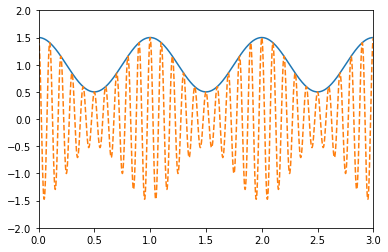

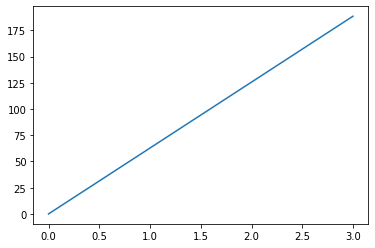

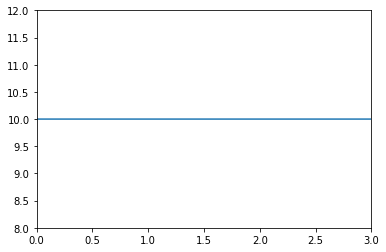

In [4]:
A_c = 1
A_m = 0.5
fm = 1
fc = 10
t = np.arange(0, 3, 0.001)

x = (A_c + A_m * np.cos(2 * np.pi * fm * t)) * np.cos(2 * np.pi * fc * t)
a = hilbert(x)
fx = np.diff(np.unwrap(np.angle(a))) / np.diff(t) / (2 * np.pi)

plt.plot(t, abs(a), t, x, "--")
plt.axis([0, 3, -2, 2])
plt.show()

plt.plot(t, np.unwrap(np.angle(a)))
plt.show()

plt.plot(t[1:], fx)
plt.axis([0, 3, 8, 12])
plt.show()

## Example 4.4 Hilbert transform: estimation of damping coefficient

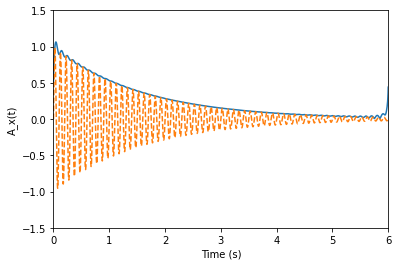

zeta_est 0.009999934717961914


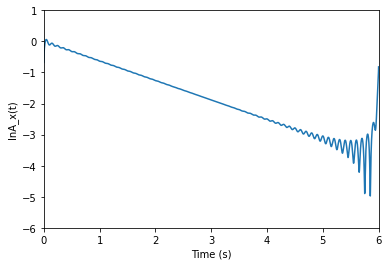

In [5]:
A = 1
zeta = 0.01
fn = 10
wn = 2 * np.pi * fn
wd = wn * np.sqrt(1 - zeta ** 2)
phi = 0
t = np.arange(0, 6, 0.001)
x = A * np.exp(-zeta * wn * t) * np.sin(wd * t + phi)

a = hilbert(x)
ax = np.log(abs(a))

plt.plot(t, abs(a), t, x, "--")
plt.axis([0, 6, -1.5, 1.5])
plt.xlabel("Time (s)"); plt.ylabel("A_x(t)")
plt.show()

plt.plot(t, ax)
plt.axis([0, 6, -6, 1])
plt.xlabel("Time (s)"); plt.ylabel("lnA_x(t)")

p = np.polyfit(t[1000:4000], ax[1000:4000], 1)
zeta_est = -p[0] / wn
print("zeta_est", zeta_est)

## Example 4.5 Hilbert transform: frequency-modulated signal

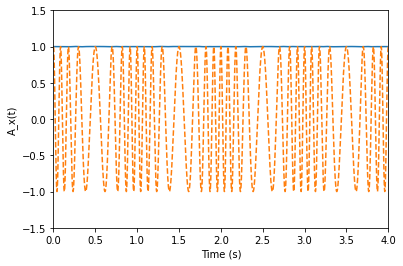

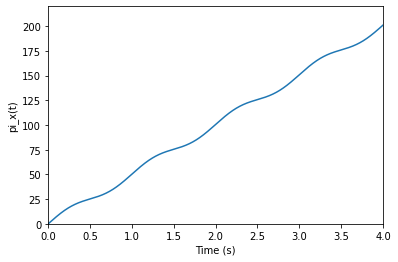

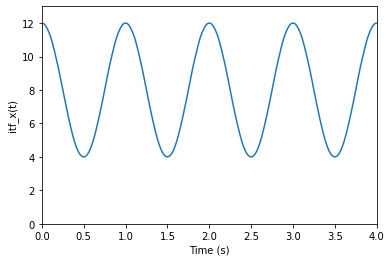

In [6]:
Ac, Am, fm, fc = 1, 4, 1, 8
t = np.arange(0, 4, 0.0001)

x = Ac * np.cos(2 * np.pi * fc * t + Am * np.sin(2 * np.pi * fm * t))
a = hilbert(x)
fx = np.diff(np.unwrap(np.angle(a))) / np.diff(t) / (2 * np.pi)

plt.plot(t, abs(a), t, x, "--"); plt.axis([0, 4, -1.5, 1.5])
plt.xlabel("Time (s)"); plt.ylabel("A_x(t)")
plt.show()

plt.plot(t, np.unwrap(np.angle(a))); plt.axis([0, 4, 0, 220])
plt.xlabel("Time (s)"); plt.ylabel("pi_x(t)")
plt.show()

plt.plot(t[1:], fx); plt.axis([0, 4, 0, 13])
plt.xlabel("Time (s)"); plt.ylabel("itf_x(t)")
plt.show()


## Example 4.6, 4.7 Effects of windowing on the modulus of the Fourier transform

### Case 1: Rectangular window (data truncation)
### Case 2: Hann window

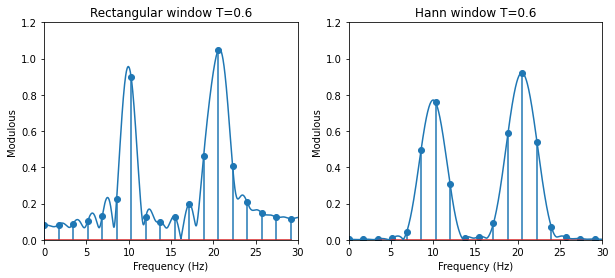

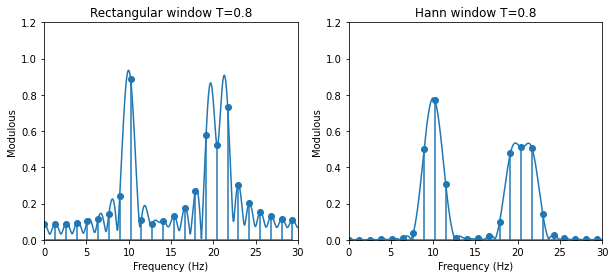

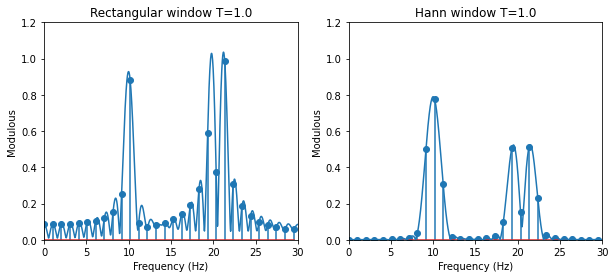

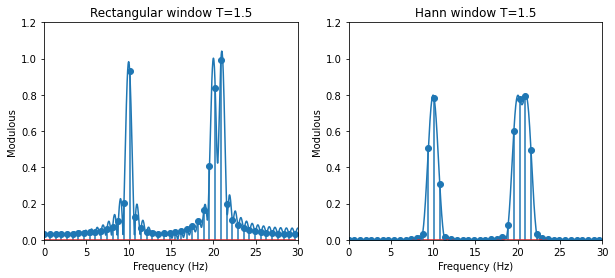

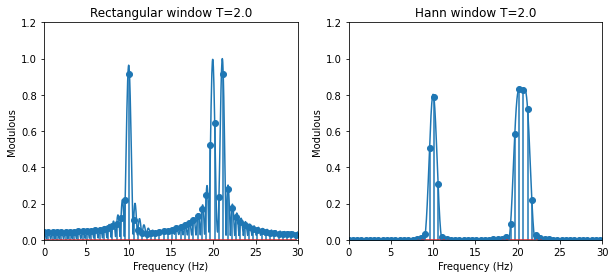

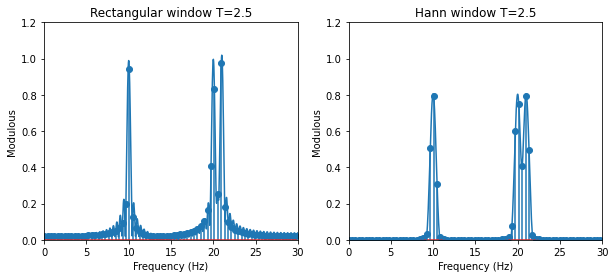

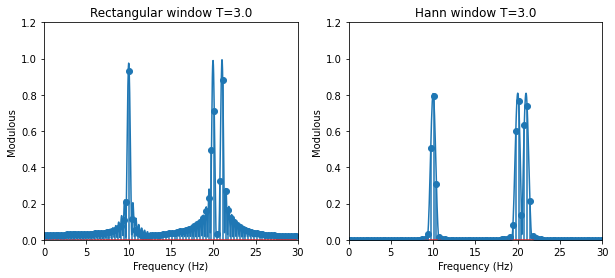

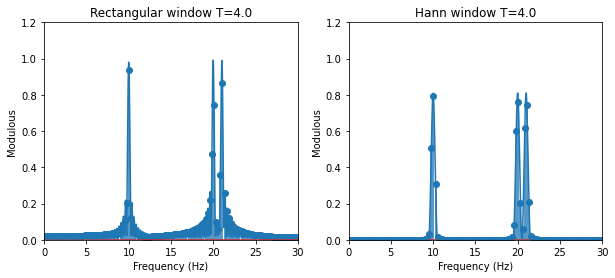

In [7]:
f1, f2, f3, fs = 10, 20, 21, 60
T_list = [0.6, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]

for T in T_list:
    t = np.arange(0, T-(1/fs), 1/fs)
    x = 2 * np.sin(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t) + 2 * np.sin(2 * np.pi * f3 * t)

    N = len(x)
    # rectangular window
    X = fftshift(fft(x))
    f = fftshift(fftfreq(X.shape[0], d=1/fs))

    x_z = np.hstack([x, np.zeros([2000 - N])])
    Xz = fftshift(fft(x_z))
    fz = fftshift(fftfreq(Xz.shape[0], d=1/fs))

    # hann window
    hann_x = np.hanning(N) * x
    hann_X = fftshift(fft(hann_x))

    hann_x_z = np.hstack([hann_x, np.zeros([2000 - N])])
    hann_Xz = fftshift(fft(hann_x_z))
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    plt.stem(f, np.abs(X) / fs / T); plt.axis([0, 30, 0, 1.2])
    plt.xlabel("Frequency (Hz)"); plt.ylabel("Modulous")
    plt.title(f"Rectangular window T={T}")
    plt.plot(fz, np.abs(Xz) / fs/ T)

    plt.subplot(1,2,2)
    plt.stem(f, np.sqrt(8/3) * np.abs(hann_X) / fs / T); plt.axis([0, 30, 0, 1.2])
    plt.xlabel("Frequency (Hz)"); plt.ylabel("Modulous")
    plt.title(f"Hann window T={T}")
    plt.plot(fz, np.sqrt(8/3) * np.abs(hann_Xz) / fs/ T)
    plt.show()

## Example 4.8 Comparison between the rectangular window and the Hann window: side roll-off characteristics

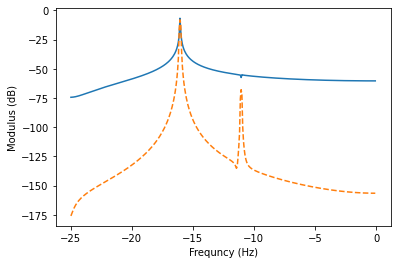

In [8]:
f1, f2, fs, T = 9, 14, 50, 15.6
t = np.arange(0, T - 1/fs, 1/fs)

x = 1 * np.sin(2 * np.pi * f1 * t) + 0.001 * np.sin(2 * np.pi * f2 * t)

N = len(x)
hann_x = np.hanning(N) * x
X = fftshift(fft(x))
hann_X = fftshift(fft(hann_x))
f = fftfreq(X.shape[0], d=1/fs)

plt.plot(f[(N//2 + 1):], 20 * np.log10(np.abs(X[(N//2 + 1):]) / fs / T))
plt.plot(f[(N//2 + 1):], 20 * np.log10(np.sqrt(8/3) * np.abs(hann_X[(N//2 + 1):]) / fs / T), "--")
plt.xlabel("Frequncy (Hz)"); plt.ylabel("Modulus (dB)")
plt.show()

## Example 4.9 Comparison between the rectangular window and the Hann window for a transient signal

### Case 1: Response of a single-degree-of-freedom system

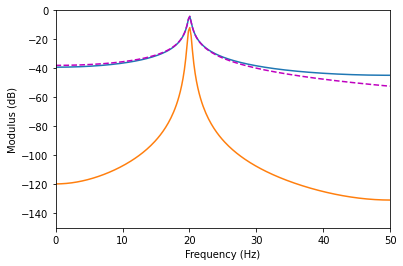

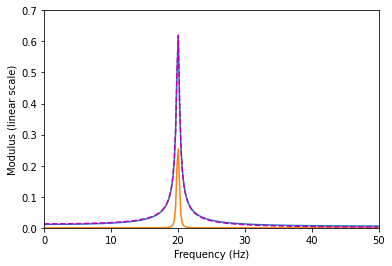

In [9]:
fs = 100
A, zeta = 200, 0.01
wn = 2 * np.pi * 20
wd = np.sqrt(1 - zeta ** 2) * wn
t = np.arange(0, 5 - (1/fs), 1/fs)

x = (A / wd) * np.exp(-zeta * wn * t) * np.sin(wd * t)

N = len(x)
X = fft(x)
hann_x = np.hanning(N) * x
hann_X = fft(hann_x)
f = fftfreq(X.shape[0], d=1/fs)

H = A / (wn ** 2 - ((2 * np.pi * f) ** 2) + (1j * 2 * zeta * wn * (2 * np.pi * f)))

mid = (N // 2) + 1
plt.plot(f[:mid], 20 * np.log10(np.abs(X[:mid] / fs)))
plt.plot(f[:mid], 20 * np.log10(np.sqrt(8/3) * np.abs(hann_X[:mid]) / fs))
plt.plot(f[:mid], 20 * np.log10(np.abs(H[:mid])), "m--")
plt.axis([0, 50, -150, 0])
plt.xlabel("Frequency (Hz)"); plt.ylabel("Modulus (dB)")
plt.show()

plt.plot(f[:mid], np.abs(X[:mid] / fs))
plt.plot(f[:mid], np.sqrt(8/3) * np.abs(hann_X[:mid] / fs))
plt.plot(f[:mid], np.abs(H[:mid]), "m--")
plt.axis([0, 50, 0, 0.7])
plt.xlabel("Frequency (Hz)"); plt.ylabel("Modulus (linear scale)")
plt.show()

## Case 2: Response of a two-degree-of-freedom system

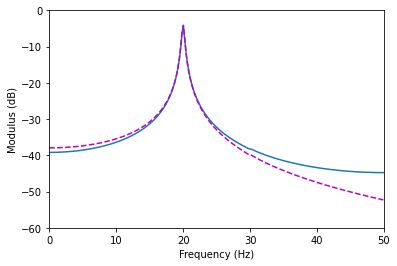

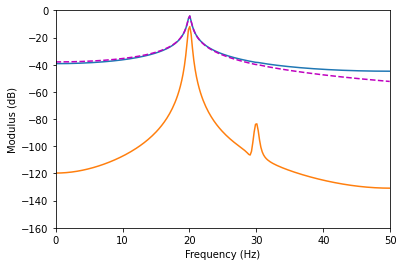

In [10]:
fs = 100
A, B, zeta1, zeta2 = 200, 0.001 * A, 0.01, 0.01
wn1, wn2 = 2 * np.pi * 20, 2 * np.pi * 30
wd1, wd2 = np.sqrt(1 - zeta1 ** 2) * wn1, np.sqrt(1 - zeta2 ** 2) * wn2
t = np.arange(0, 5 - (1/fs), 1/fs)

x = (A / wd1) * np.exp(-zeta1 * wn1 * t) * np.sin(wd1 * t) + (B / wd2) * np.exp(-zeta2 * wn2 * t) * np.sin(wd2 * t)

N = len(x)
X = fft(x)
hann_x = np.hanning(N) * x
hann_X = fft(hann_x)
f = fftfreq(X.shape[0], d=1/fs)

H = A / (wn1 ** 2 - ((2 * np.pi * f) ** 2) + (1j * 2 * zeta1 * wn1 * (2 * np.pi * f))) \
    + B / (wn2 ** 2 - ((2 * np.pi * f) ** 2) + (1j * 2 * zeta2 * wn2 * (2 * np.pi * f)))


mid = (N // 2) + 1
plt.plot(f[:mid], 20 * np.log10(np.abs(X[:mid] / fs)))
plt.plot(f[:mid], 20 * np.log10(np.abs(H[:mid])), "m--")
plt.axis([0, 50, -60, 0])
plt.xlabel("Frequency (Hz)"); plt.ylabel("Modulus (dB)")
plt.show()

plt.plot(f[:mid], 20 * np.log10(np.abs(X[:mid] / fs)))
plt.plot(f[:mid], 20 * np.log10(np.sqrt(8/3) * np.abs(hann_X[:mid]) / fs))
plt.plot(f[:mid], 20 * np.log10(np.abs(H[:mid])), "m--")
plt.axis([0, 50, -160, 0])
plt.xlabel("Frequency (Hz)"); plt.ylabel("Modulus (dB)")
plt.show()